In [38]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import RobustScaler


In [39]:
# loading Data
df = pd.read_csv('heart.csv')

In [40]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [43]:
df.shape

(303, 14)

In [44]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [45]:
output_counts = df['output'].value_counts()
output_counts

output
1    165
0    138
Name: count, dtype: int64

In [46]:
# Select numerical columns
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
num_data = df[num_cols]

In [47]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(num_data))

In [48]:
# Identify outliers (Z-score > 3)
outliers = (z_scores > 3).any(axis=1)

In [49]:
# Select rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
outlier_rows

Rows with outliers:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


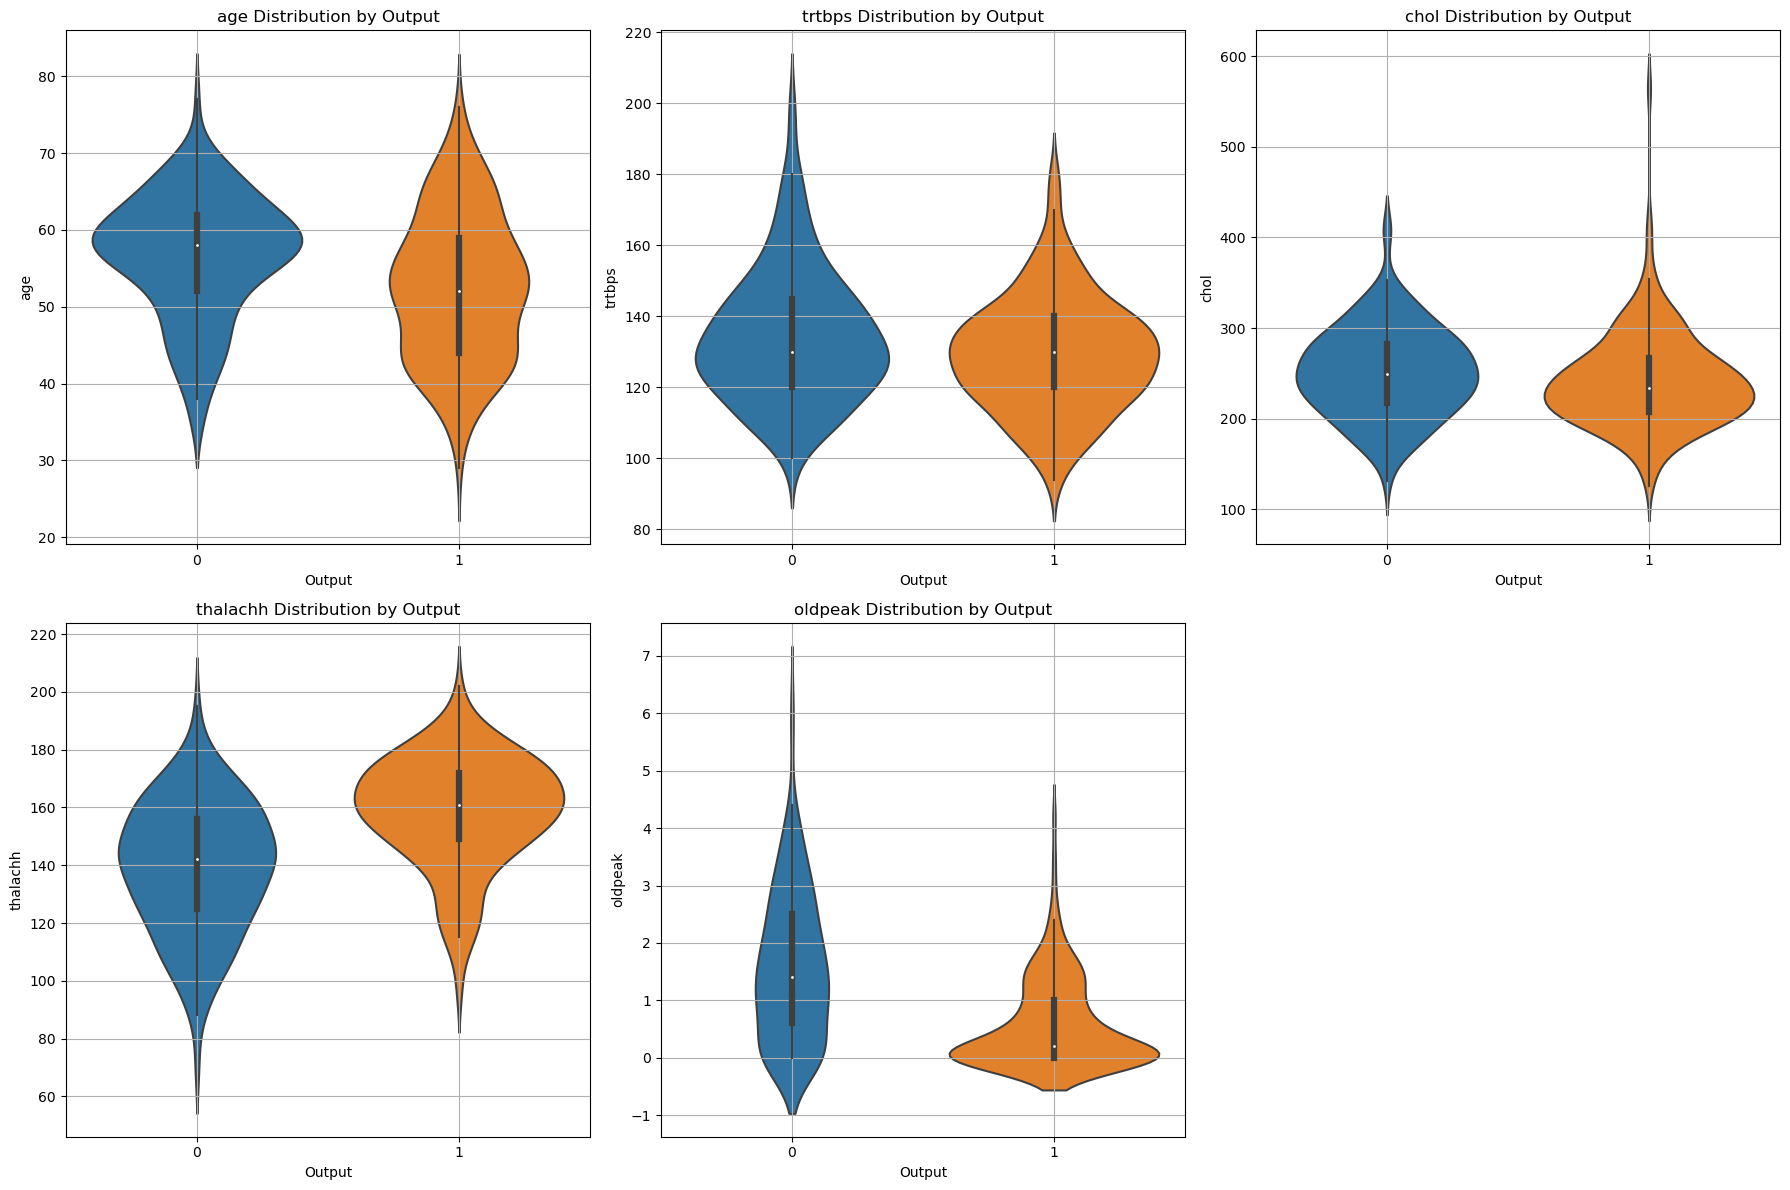

In [50]:
# Define your features (numerical and categorical)
features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
output_column = 'output'

# Set up the plot configurations
plt.figure(figsize=(18, 12))

# Create a plot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Arrange the plots in a 2x3 grid
    sns.violinplot(x=output_column, y=feature, data=df)
    plt.title(f'{feature} Distribution by Output')
    plt.xlabel('Output')
    plt.ylabel(feature)
    plt.grid(True)

# Adjust the layout and save the plots
plt.tight_layout()
plt.savefig('violin_plots.png')  # Save the plots to the computer
plt.show()


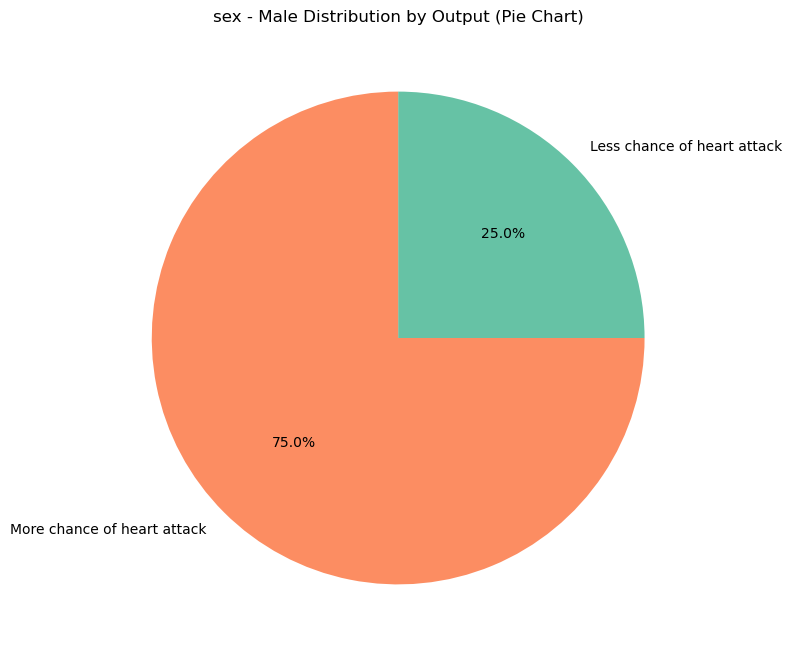

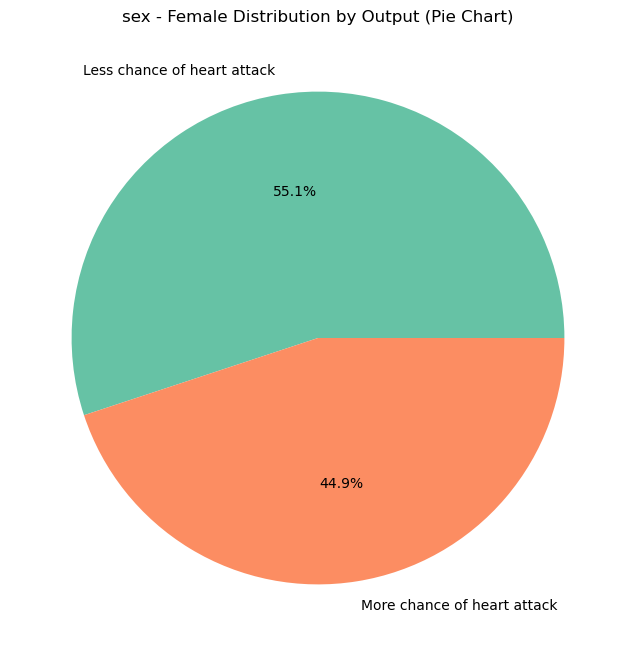

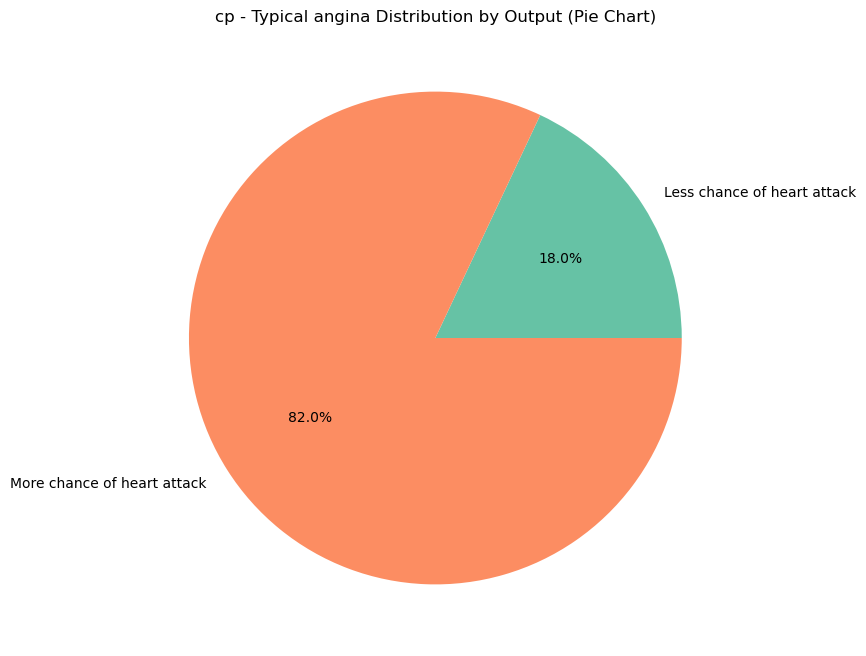

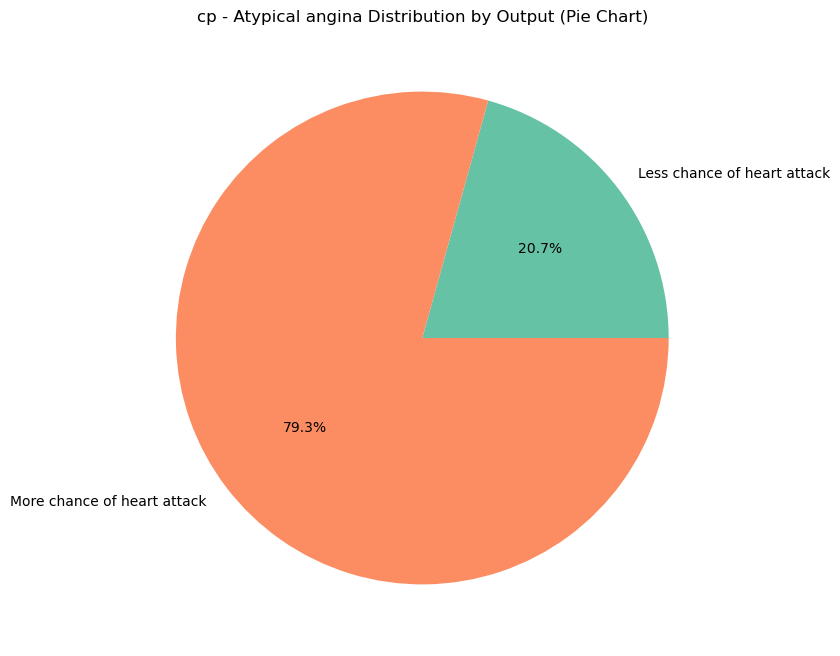

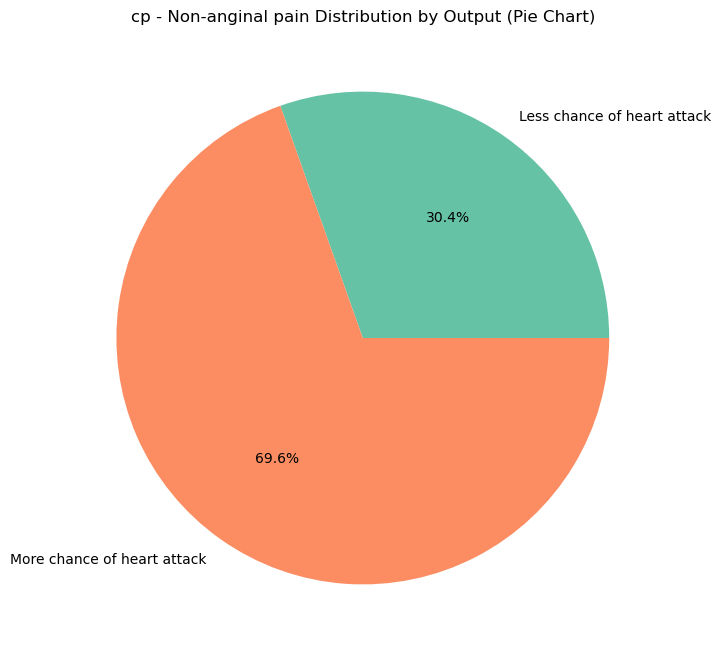

Category 4 for feature cp is not present in the data.


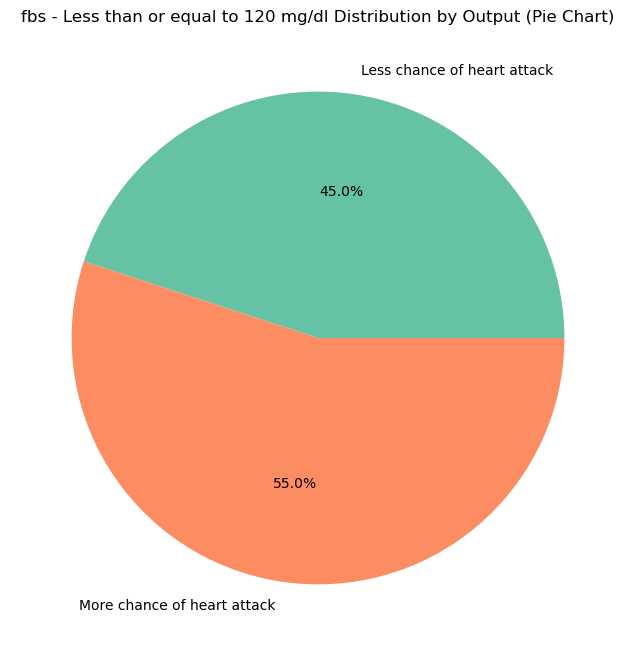

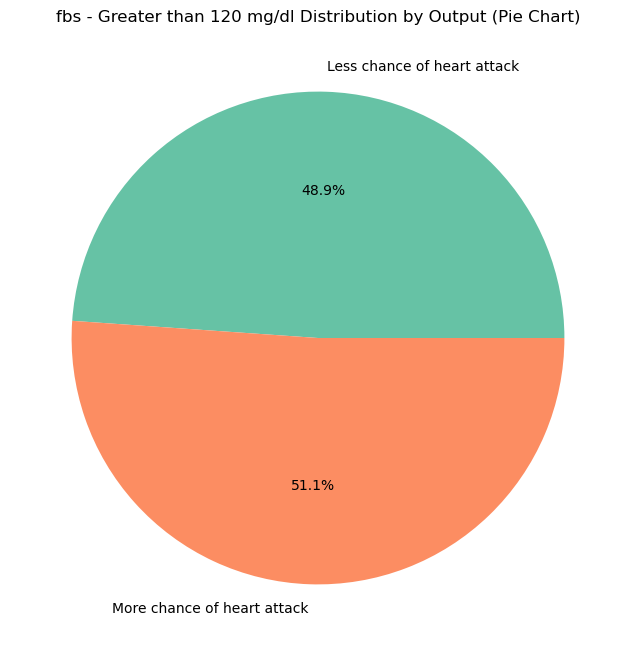

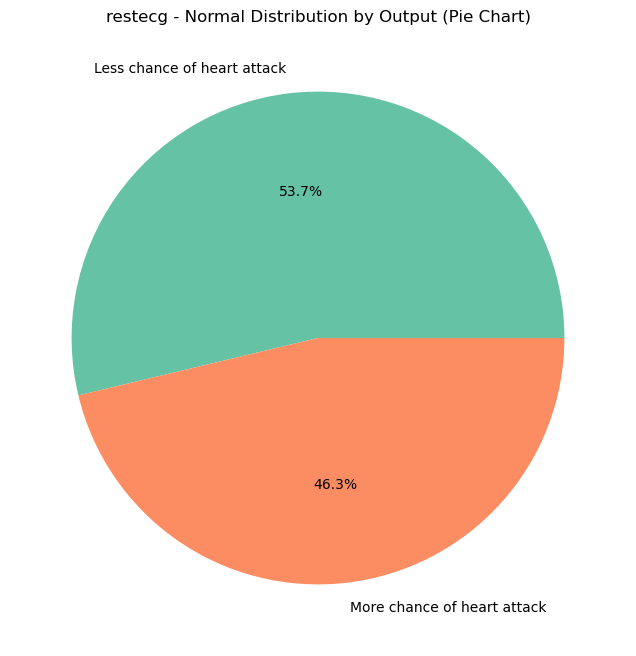

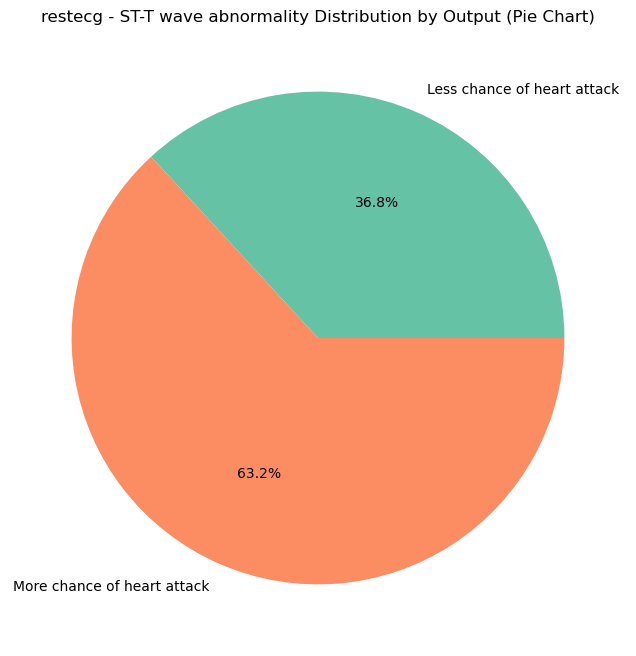

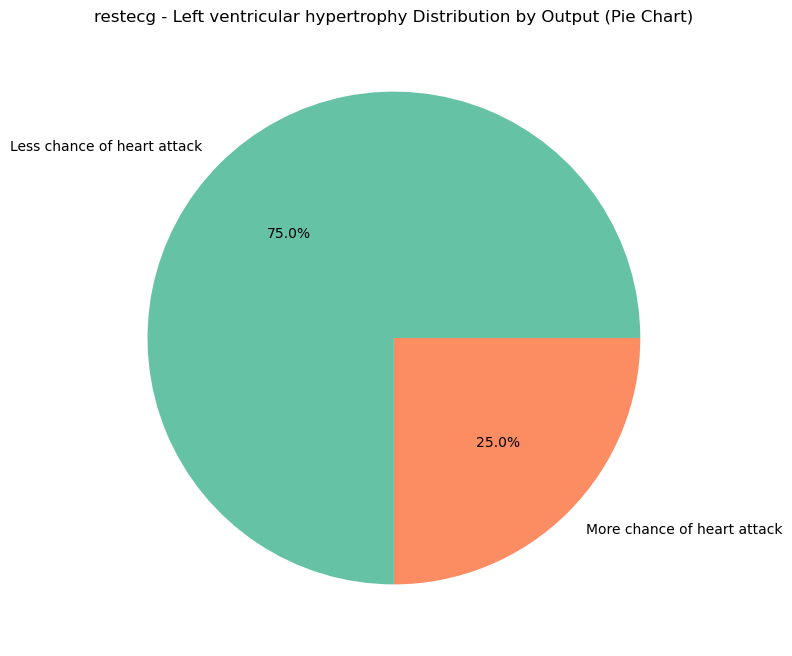

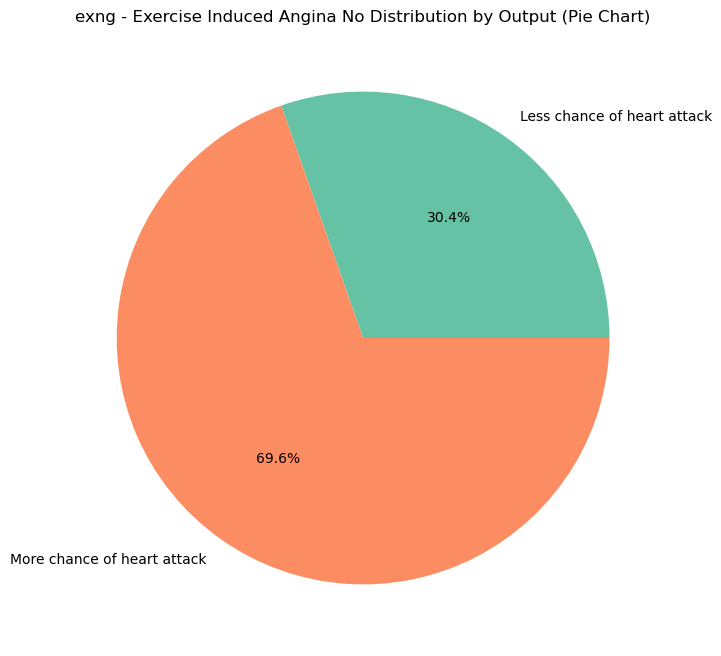

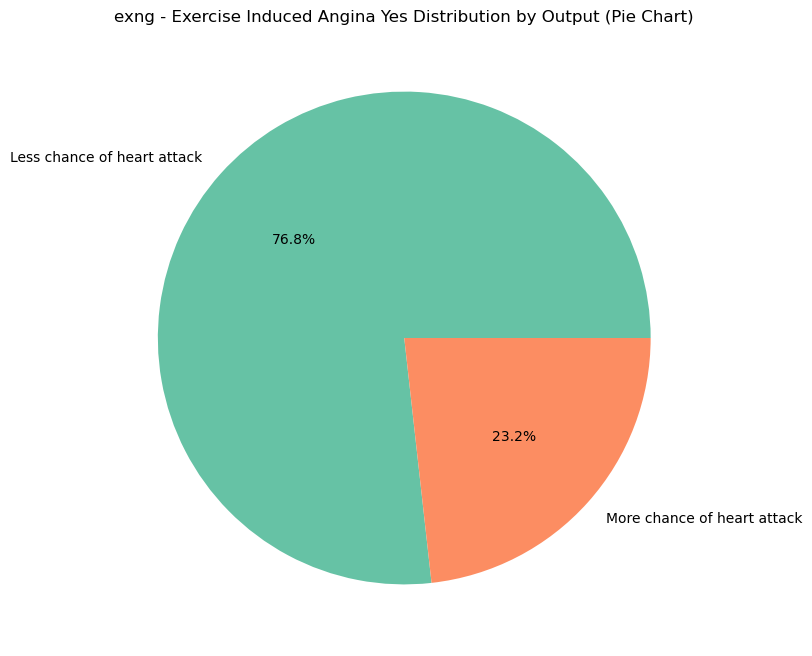

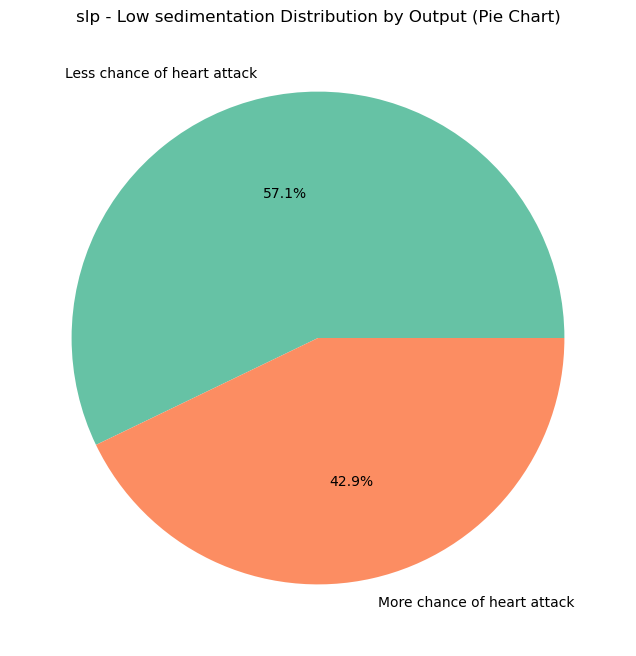

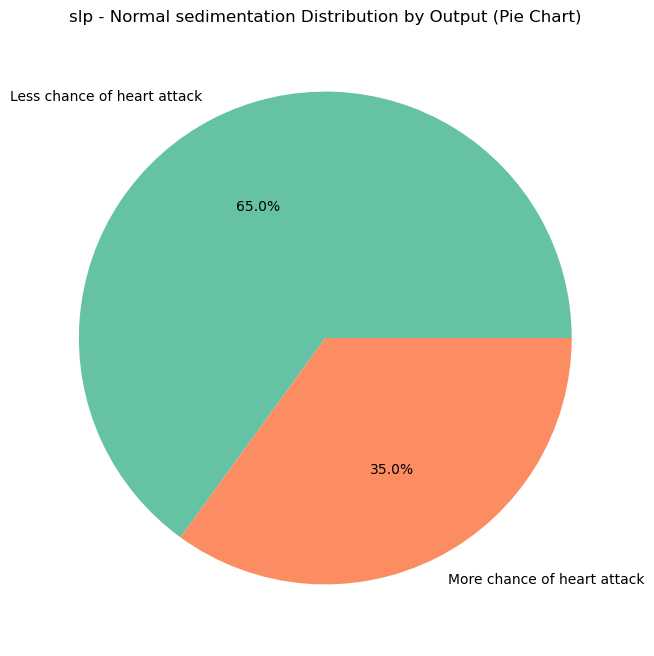

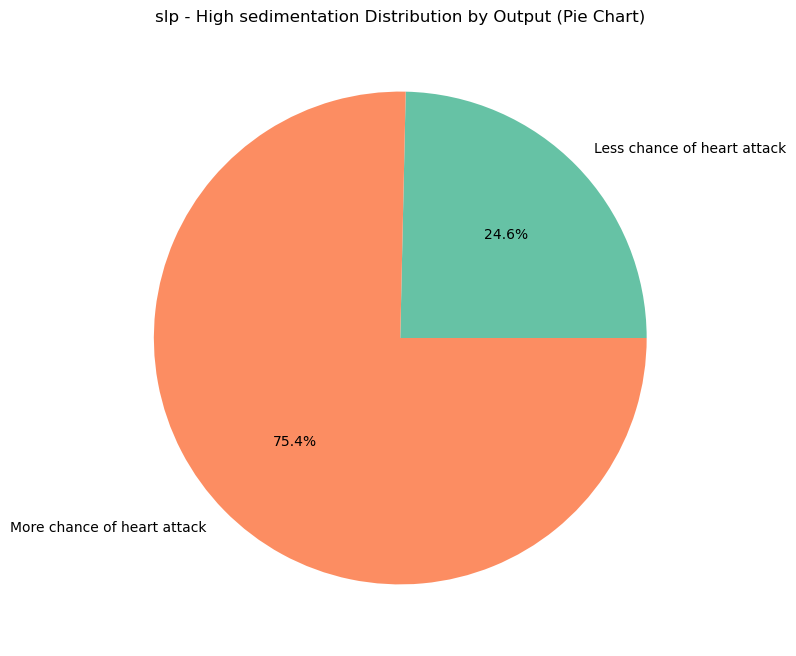

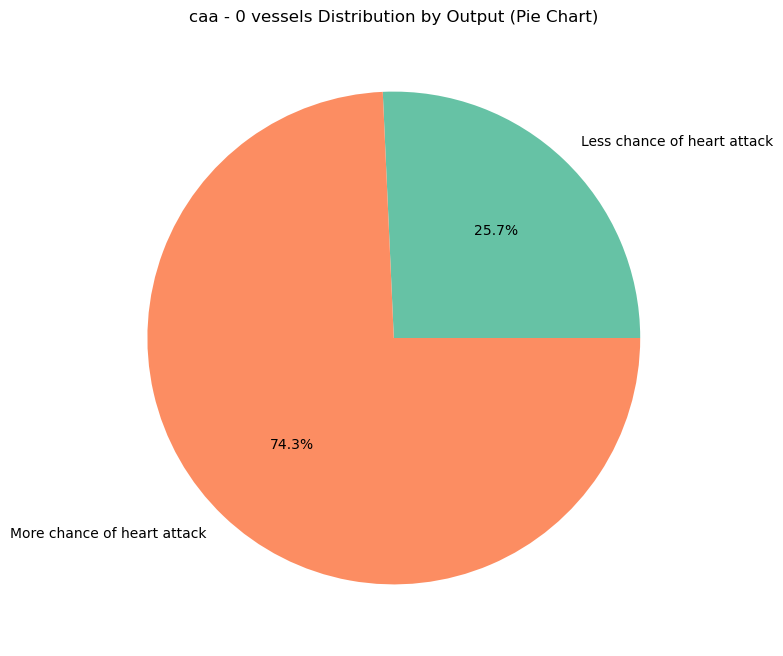

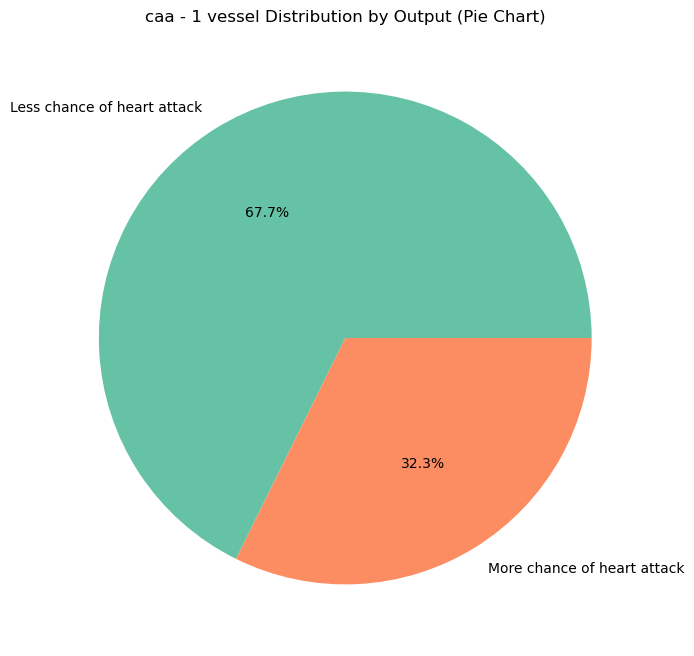

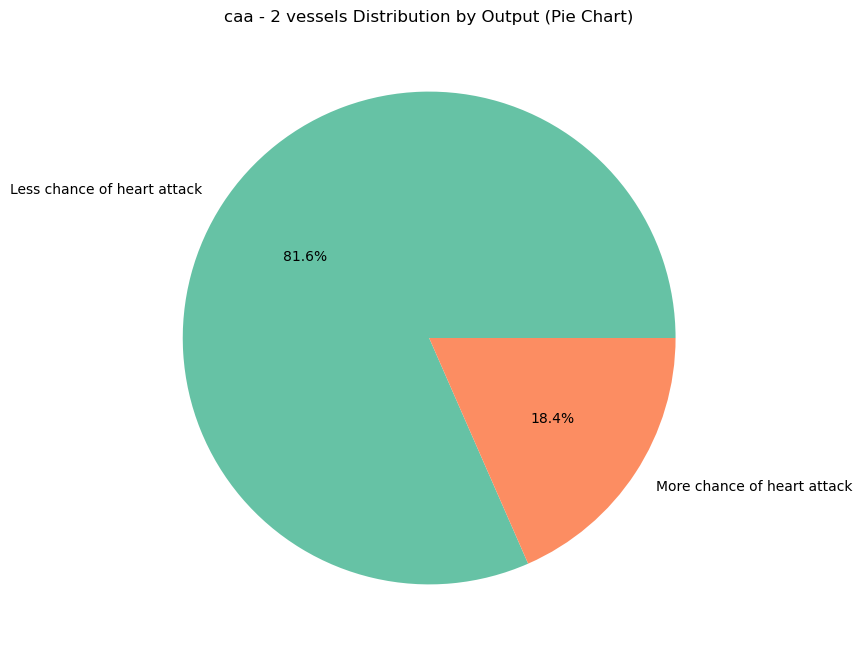

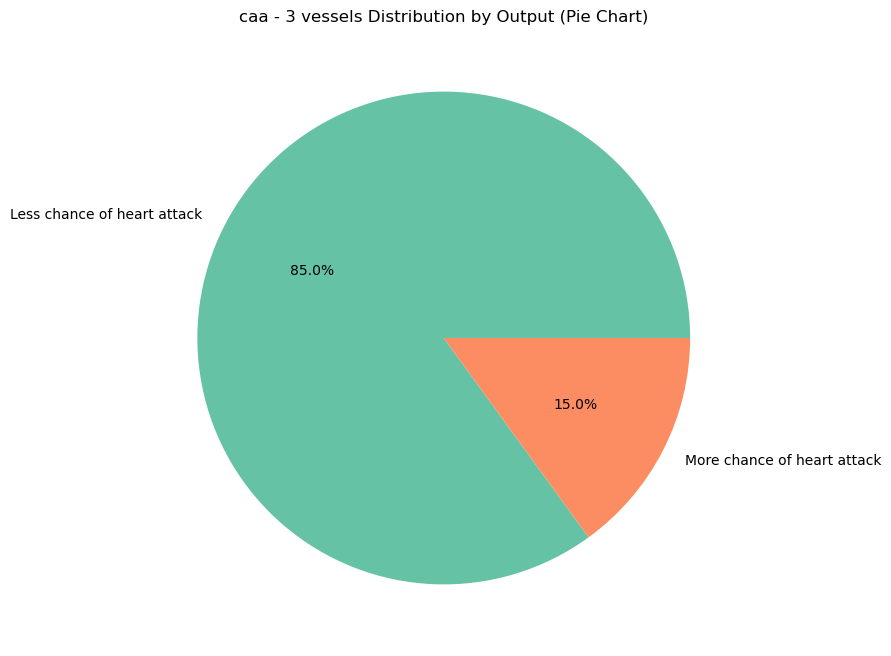

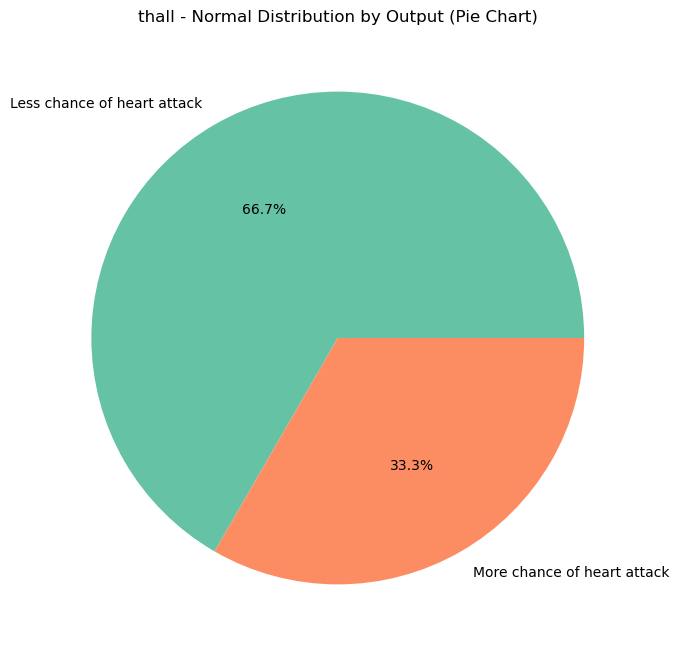

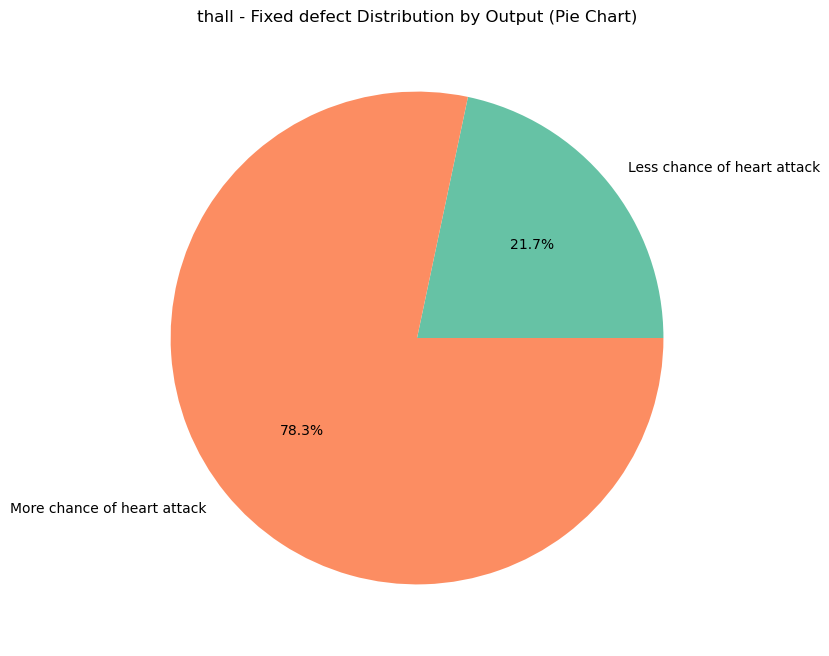

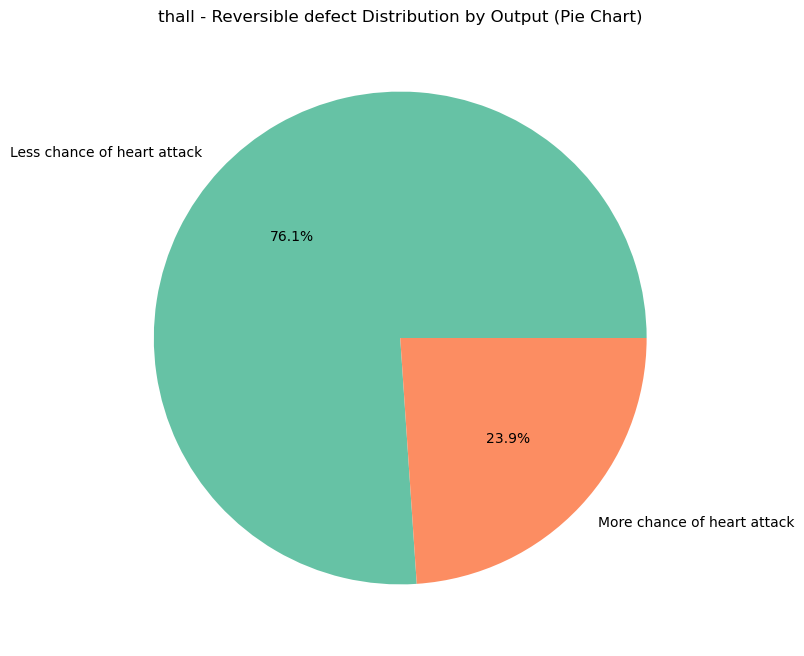

In [51]:
# Define your categorical features
categorical_features = {
    'sex': {0: 'Male', 1: 'Female'},
    'cp': {1: 'Typical angina', 2: 'Atypical angina', 3: 'Non-anginal pain', 4: 'Asymptomatic'},
    'fbs': {0: 'Less than or equal to 120 mg/dl', 1: 'Greater than 120 mg/dl'},
    'restecg': {0: 'Normal', 1: 'ST-T wave abnormality', 2: 'Left ventricular hypertrophy'},
    'exng': {0: 'Exercise Induced Angina No', 1: 'Exercise Induced Angina Yes'},
    'slp': {0: 'Low sedimentation', 1: 'Normal sedimentation', 2: 'High sedimentation'},  # Example values (verify description from dataset)
    'caa': {0: '0 vessels', 1: '1 vessel', 2: '2 vessels', 3: '3 vessels'},
    'thall': {1: 'Normal', 2: 'Fixed defect', 3: 'Reversible defect'}  # Example values (verify description from dataset)
}

# Create pie charts
for feature, labels in categorical_features.items():
    # Calculate the percentage of output values for each category
    feature_counts = df.groupby([feature, 'output']).size().unstack().fillna(0)
    
    # Check for existing categories
    existing_categories = feature_counts.index.tolist()
    
    for category, label in labels.items():
        if category in existing_categories:
            plt.figure(figsize=(8, 8))
            category_counts = feature_counts.loc[category]
            plt.pie(category_counts, labels=['Less chance of heart attack', 'More chance of heart attack'], autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
            plt.title(f'{feature} - {label} Distribution by Output (Pie Chart)')
            plt.show()
        else:
            print(f'Category {category} for feature {feature} is not present in the data.')


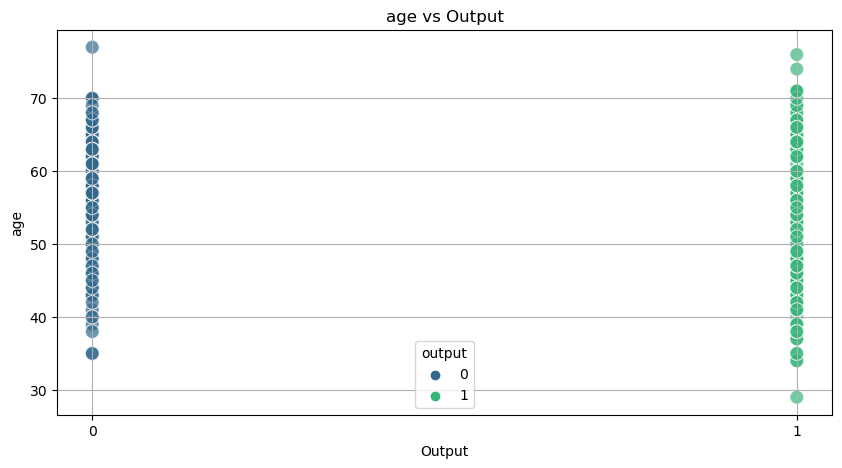

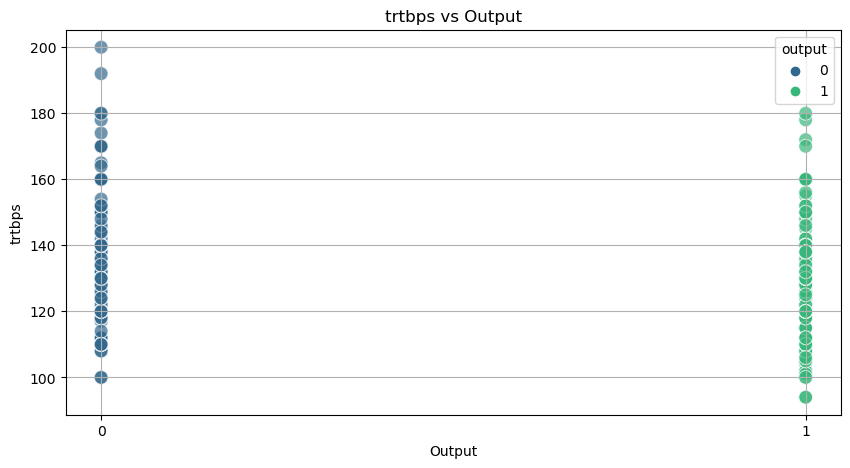

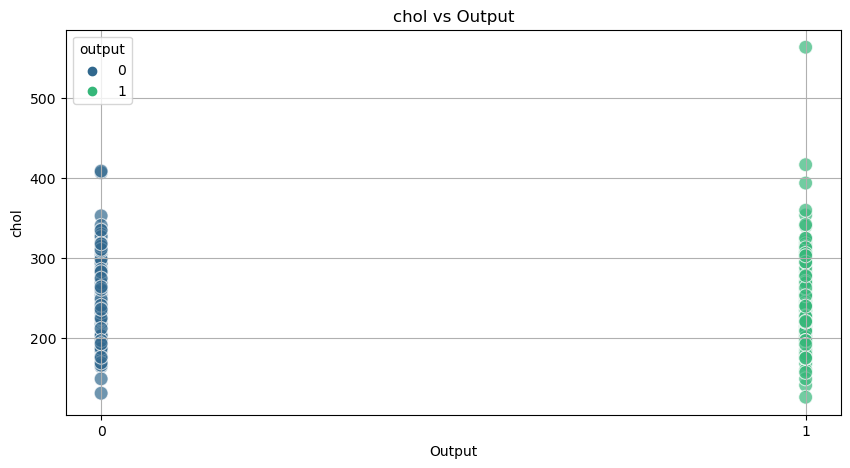

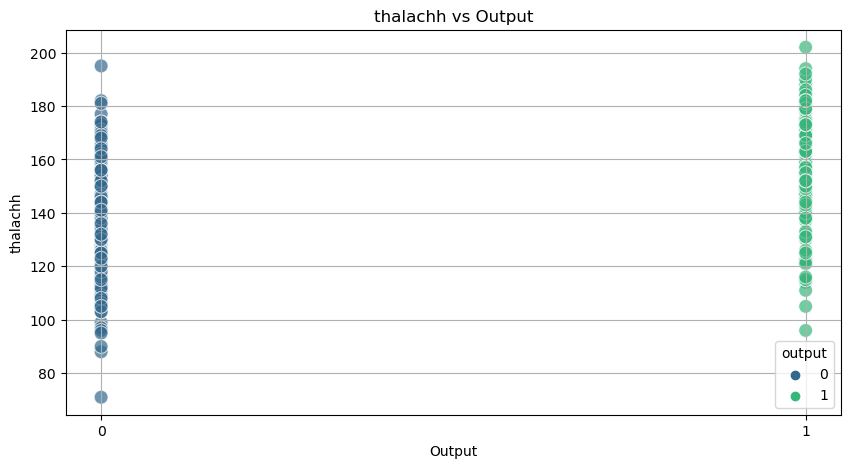

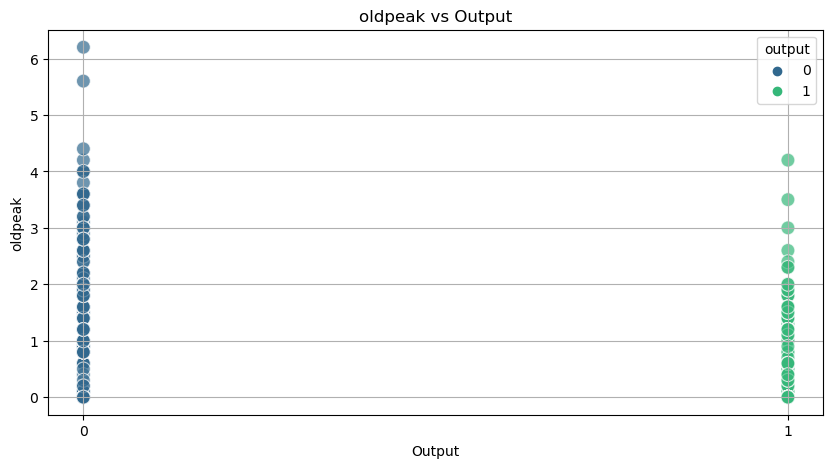

In [52]:
# Numerical features
numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Create scatter plots for numerical features
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='output', y=feature, data=df, hue='output', palette='viridis', alpha=0.7, s=100)
    plt.title(f'{feature} vs Output')
    plt.xlabel('Output')
    plt.ylabel(feature)
    plt.xticks(ticks=[0, 1])  # Show only 0 and 1 values on the x-axis
    plt.grid(True)
    plt.show()

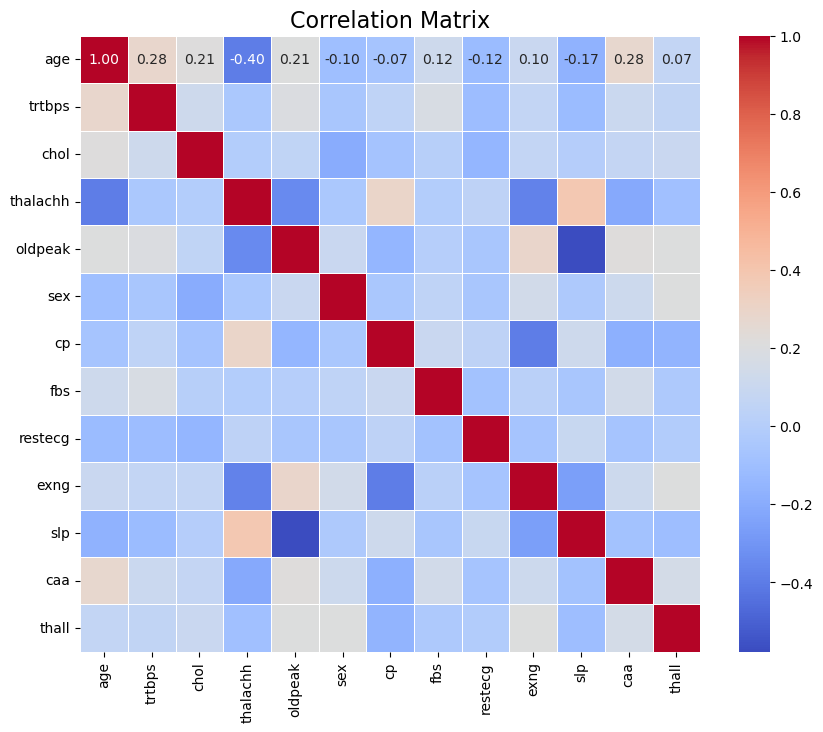

In [53]:
# Select numerical features
numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
numeric_data = df[numeric_features]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Increase the figure size
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})  # Increase font size
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [54]:
correlation_matrix

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.068001
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.062210
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.098803
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.096439
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210244
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.210041
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.161736
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.011981
exng,0.096801,0.067616,0.067023,-0.378812,0.288223,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.206754


In [67]:
# Load the dataframe
df1 = df.copy()

# Define columns to encode and scale
cat_cols = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
con_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

# Encode categorical columns and scale continuous columns
df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True)
X = df1.drop('output', axis=1)
y = df1['output']

# Initialize scaler and model, fit the model
scaler = RobustScaler()
X[con_cols] = scaler.fit_transform(X[con_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)  # max_iter added to prevent convergence issues
logreg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logreg.predict(X_test)

print(f"The test accuracy score of Logistic Regression is {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Less chance of heart attack', 'More chance of heart attack']))

The test accuracy score of Logistic Regression is 0.9016

Classification Report:
                              precision    recall  f1-score   support

Less chance of heart attack       0.87      0.93      0.90        29
More chance of heart attack       0.93      0.88      0.90        32

                   accuracy                           0.90        61
                  macro avg       0.90      0.90      0.90        61
               weighted avg       0.90      0.90      0.90        61

